In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1) Import required libraries**

In [ ]:
import os
import cv2
import PIL
import numpy as np
import pandas as pd
from PIL import Image as Img
from PIL import ImageTk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.applications.vgg16 import VGG16,preprocess_input
from IPython.display import Image, display
from os import listdir
from os.path import isfile, join


import tensorflow as tf
import seaborn as sn
#from tensorflow.python.keras import backend as K


import math
import datetime
import platform
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import Input,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras import Model 


In [ ]:
tf.__version__

'2.7.0'

**2) Data loading and exploration**

In [ ]:
fpath = "/content/drive/MyDrive/datasets"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Viral Pneumonia', 'covid negative', 'covid positive'] 

No. of categories =  3


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg") or (file_ext.lower() == "png"):
                print(f"\nCategory = {category}, Image name = {image_name}") 
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                #print(img)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #print(img)
                img_array = Img.fromarray(img, 'RGB')
                #print(img_array)
                #resize image to 299 x 299 because the input image resolution for vggNet is 299 x 299
                resized_img = img_array.resize((180, 180))
                #print(resized_img)
                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
#print(type(images),type(labels))

Streaming output truncated to the last 5000 lines.

Category = covid positive, Image name = COVID-556.png

Category = covid positive, Image name = COVID-561.png

Category = covid positive, Image name = COVID-555.png

Category = covid positive, Image name = COVID-559.png

Category = covid positive, Image name = COVID-565.png

Category = covid positive, Image name = COVID-560.png

Category = covid positive, Image name = COVID-566.png

Category = covid positive, Image name = COVID-563.png

Category = covid positive, Image name = COVID-56.png

Category = covid positive, Image name = COVID-557.png

Category = covid positive, Image name = COVID-553.png

Category = covid positive, Image name = COVID-558.png

Category = covid positive, Image name = COVID-576.png

Category = covid positive, Image name = COVID-568.png

Category = covid positive, Image name = COVID-57.png

Category = covid positive, Image name = COVID-570.png

Category = covid positive, Image name = COVID-573.png

Category = covi

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (7316, 180, 180, 3) 
Labels shape =  (7316,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Training data shape :  (7316, 180, 180, 3) (7316,)
Total number of outputs :  3
Output classes :  [0 1 2]


Text(0.5, 1.0, 'Leaf : 0')

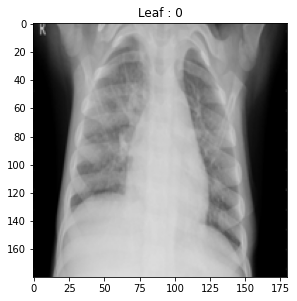

In [ ]:
print('Training data shape : ', images.shape,labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(images[25,:,:], cmap='gray')
plt.title("Leaf : {}".format(labels[25]))



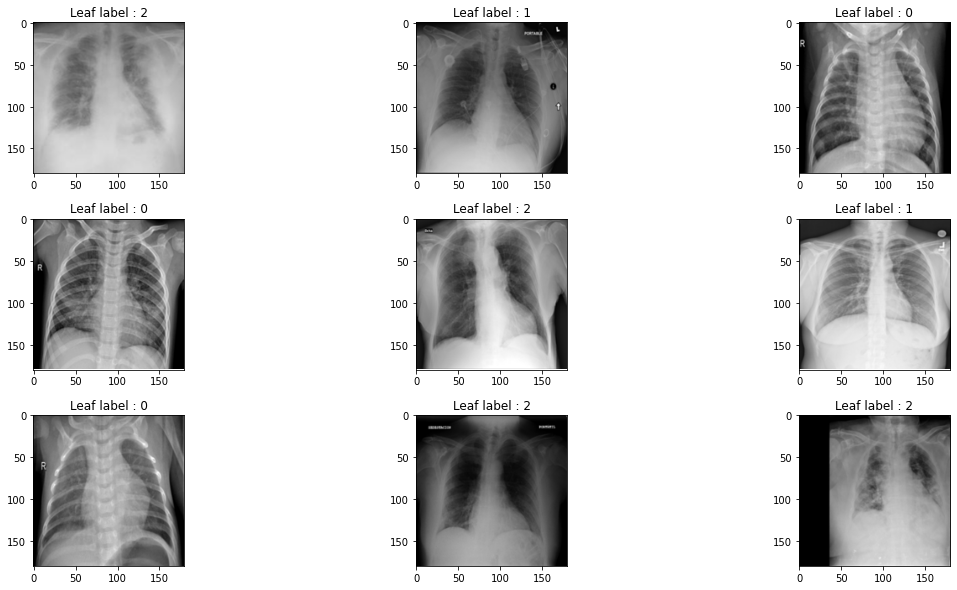

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        #plt.figure(figsize=[10,5])

        plt.title('Leaf label : {}'.format(labels[r[0]]))
#        plt.xticks([])
#       plt.yticks([])
      
    plt.show()
    
display_rand_images(images, labels)

**3) Prepare data for CNN model training**

Step 1 - shuffle the data loaded from the dataset

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
#print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
#print("\n'n' values after shuffling = ",n)

In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (7316, 180, 180, 3) 
Labels shape after shuffling =  (7316,)


Step 2 - Data normalization

In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (7316, 180, 180, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state =random_seed)


print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("\ny_test shape = ",y_test.shape)




x_train shape =  (5852, 180, 180, 3)
y_train shape =  (5852,)

x_test shape =  (1464, 180, 180, 3)

y_test shape =  (1464,)


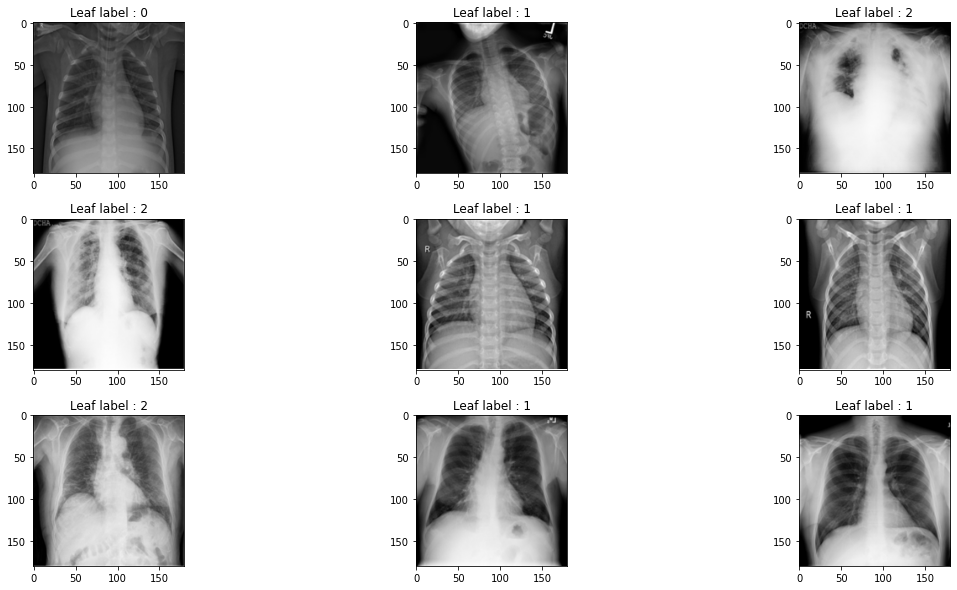

In [ ]:
display_rand_images(images, labels)

**4) Define CNN model (VGG 16)**

In [ ]:
from tensorflow.keras.layers import (
    BatchNormalization
)

In [ ]:
def create_model():
  base_model = tf.keras.applications.VGG16(
      include_top=False, weights='imagenet', input_shape=(180, 180, 3)
  )
  base_model.trainable= False
  x=Flatten()(base_model.output)
  x = Dense(4096, activation='relu')(x)
  x = Dropout(.3)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(.1)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(.05)(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(16, activation='relu')(x)
  output=Dense(3,activation='softmax')(x) # because we have to predict the AUC
  model=Model(base_model.input,output)
  
  return model

model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist= model.fit(x_train, y_train, batch_size=150, epochs=15)

Epoch 1/15
40/40 [==============================] - 1743s 44s/step - loss: 1.0420 - accuracy: 0.4580
Epoch 2/15
40/40 [==============================] - 1728s 43s/step - loss: 0.4616 - accuracy: 0.8110
Epoch 3/15
40/40 [==============================] - 1732s 43s/step - loss: 0.2335 - accuracy: 0.9168
Epoch 4/15
40/40 [==============================] - 1731s 43s/step - loss: 0.2467 - accuracy: 0.9125
Epoch 5/15
40/40 [==============================] - 1730s 43s/step - loss: 0.1649 - accuracy: 0.9434
Epoch 6/15
40/40 [==============================] - 1728s 43s/step - loss: 0.1138 - accuracy: 0.9614
Epoch 7/15
40/40 [==============================] - 1729s 43s/step - loss: 0.0944 - accuracy: 0.9663
Epoch 8/15
40/40 [==============================] - 1732s 43s/step - loss: 0.0686 - accuracy: 0.9773
Epoch 9/15
40/40 [==============================] - 1732s 43s/step - loss: 0.0989 - accuracy: 0.9665
Epoch 10/15
40/40 [==============================] - 1732s 43s/step - loss: 0.0748 - accura

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

46/46 [==============================] - 428s 9s/step - loss: 0.3024 - accuracy: 0.9344
0.3023777902126312 0.9344262480735779


Validation Accuracy

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=150,
    epochs=5,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test)
)

Epoch 1/5
40/40 [==============================] - 2163s 54s/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.1802 - val_accuracy: 0.9488
Epoch 2/5
40/40 [==============================] - 2125s 53s/step - loss: 0.0237 - accuracy: 0.9908 - val_loss: 0.1885 - val_accuracy: 0.9508
Epoch 3/5
40/40 [==============================] - 2114s 53s/step - loss: 0.0324 - accuracy: 0.9877 - val_loss: 0.2043 - val_accuracy: 0.9542
Epoch 4/5
40/40 [==============================] - 2112s 53s/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.3153 - val_accuracy: 0.9399
Epoch 5/5
40/40 [==============================] - 2106s 53s/step - loss: 0.0794 - accuracy: 0.9721 - val_loss: 0.2756 - val_accuracy: 0.9413


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

46/46 [==============================] - 426s 9s/step - loss: 0.2756 - accuracy: 0.9413
0.2755601108074188 0.9412568211555481


Display few random images with actual vs predicted values of labels

In [ ]:
pred = model.predict(x_test)

pred.shape

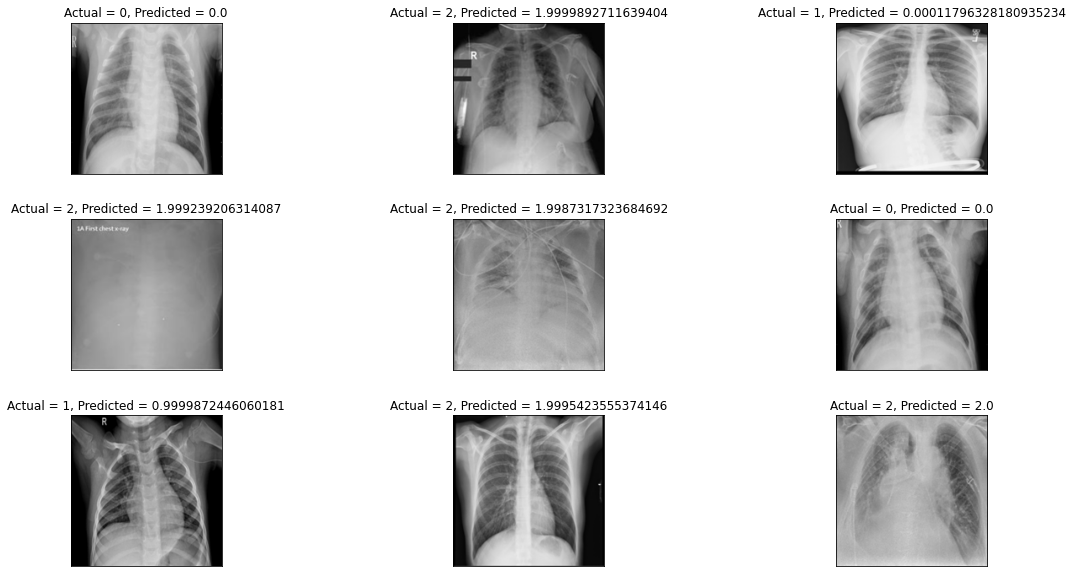

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

**Accuracy Graph**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])

plt.plot(hist.history['loss'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       246
           1       0.98      0.90      0.93       653
           2       0.91      0.98      0.94       565

    accuracy                           0.94      1464
   macro avg       0.94      0.95      0.94      1464
weighted avg       0.94      0.94      0.94      1464

Confusion Matrix
[[236   8   2]
 [ 12 586  55]
 [  2   7 556]]


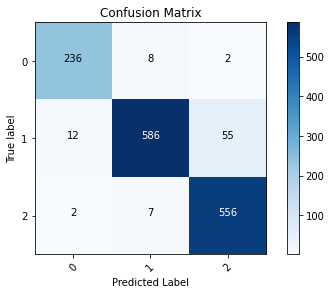

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred= np.argmax(pred,axis=-1))
print(classification_report(y_test, np.argmax(pred,axis=-1)))
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap = plt.cm.Blues,model_name="name"):
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        com = cm.astype('np.float32') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix")
    print(cm)
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = "white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.savefig("cm"+model_name+".jpg", dpi=600, bbox_inches='tight')
    plt.savefig("cm"+model_name+".png", dpi=300, bbox_inches='tight')
plot_confusion_matrix(cm,classes, title="Confusion Matrix",model_name="VGG16")

**7) Save trained model, weights**

In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/Colab Notebooks/model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("/content/model1.h5")
print("\nModel weights saved!")

**Convert To tflite**

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

**Convert To tflite**

In [ ]:
# save model in tflite
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('model.tflite')
